<a href="https://colab.research.google.com/github/sanky2501/Predictive-Analysis-using-Random-Forest/blob/master/EDI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Converting txt to csv

In [0]:
import numpy as np
import pandas as pd
import featuretools as ft
#import utils

data_path = 'https://raw.githubusercontent.com/sanky2501/EDI-SEM-3/master/CMAPSSData/train_FD004.txt'

operational_settings = ['operational_setting_{}'.format(i + 1) for i in range (3)]
sensor_columns = ['sensor_measurement_{}'.format(i + 1) for i in range(26)]
cols = ['engine_no', 'time_in_cycles'] + operational_settings + sensor_columns
data = pd.read_csv(data_path, sep=' ', header=None, names=cols)
data = data.drop(cols[-5:], axis=1)
data['index'] = data.index
data.index = data['index']
data['time'] = pd.date_range('1/1/2000', periods=data.shape[0], freq='600s')
print('Loaded data with:\n{} Recordings\n{} Engines'.format(data.shape[0], len(data['engine_no'].unique())))
print('21 Sensor Measurements\n3 Operational Settings')

data.head()


Loaded data with:
61249 Recordings
249 Engines
21 Sensor Measurements
3 Operational Settings


,engine_no,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,index,time
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,1.01,41.69,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,0,2000-01-01 00:00:00
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,1.07,43.94,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,1,2000-01-01 00:10:00
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,1.01,41.66,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,2,2000-01-01 00:20:00
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,1.02,41.68,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,3,2000-01-01 00:30:00
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,1915.22,7994.94,0.93,36.48,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,4,2000-01-01 00:40:00


In [0]:
data.shape

(61249, 28)

In [0]:
data.columns

Index(['engine_no', 'time_in_cycles', 'operational_setting_1',
       'operational_setting_2', 'operational_setting_3',
       'sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3',
       'sensor_measurement_4', 'sensor_measurement_5', 'sensor_measurement_6',
       'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9',
       'sensor_measurement_10', 'sensor_measurement_11',
       'sensor_measurement_12', 'sensor_measurement_13',
       'sensor_measurement_14', 'sensor_measurement_15',
       'sensor_measurement_16', 'sensor_measurement_17',
       'sensor_measurement_18', 'sensor_measurement_19',
       'sensor_measurement_20', 'sensor_measurement_21', 'index', 'time'],
      dtype='object')

In [0]:
data.to_csv('dataset_train_FD004.csv')

In [0]:
import numpy as np
import pandas as pd
import featuretools as ft
import utils

data_path = 'https://raw.githubusercontent.com/sanky2501/EDI-SEM-3/master/CMAPSSData/train_FD004.txt'
data = utils.load_data(data_path)
data.head()

ValueError: ignored

In [0]:
cutoff_times.head

AttributeError: ignored

# Start

In [0]:
#https://raw.githubusercontent.com/sanky2501/EDI-SEM-3/master/dataset_train_FD004.csv


dataset = pd.read_csv('https://raw.githubusercontent.com/sanky2501/EDI-SEM-3/master/dataset_train_FD004.csv')
dataset.shape

(61249, 29)

In [0]:
dataset.columns

Index(['index', 'engine_no', 'time_in_cycles', 'operational_setting_1',
       'operational_setting_2', 'operational_setting_3',
       'sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3',
       'sensor_measurement_4', 'sensor_measurement_5', 'sensor_measurement_6',
       'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9',
       'sensor_measurement_10', 'sensor_measurement_11',
       'sensor_measurement_12', 'sensor_measurement_13',
       'sensor_measurement_14', 'sensor_measurement_15',
       'sensor_measurement_16', 'sensor_measurement_17',
       'sensor_measurement_18', 'sensor_measurement_19',
       'sensor_measurement_20', 'sensor_measurement_21', 'index.1', 'time'],
      dtype='object')

Cuttoff time

In [0]:
from random import randint
import pandas as pd

def new_labels(data, labels):
    ct_ids = []
    ct_times = []
    ct_labels = []
    data = data.copy()
    data['RUL'] = labels
    gb = data.groupby(['engine_no'])
    for engine_no_df in gb:
        instances = engine_no_df[1].shape[0]
        r = randint(5, instances - 1)
        ct_ids.append(engine_no_df[1].iloc[r,:]['engine_no'])
        ct_times.append(engine_no_df[1].iloc[r,:]['time'])
        ct_labels.append(engine_no_df[1].iloc[r,:]['RUL'])
    ct = pd.DataFrame({'engine_no': ct_ids,
                       'cutoff_time': ct_times,
                       'RUL': ct_labels})
    ct = ct[['engine_no', 'cutoff_time', 'RUL']]
    ct.index = ct['engine_no']
    ct.index = ct.index.rename('index')
    return ct

def make_cutoff_times(data):
    gb = data.groupby(['engine_no'])
    labels = []


    for engine_no_df in gb:
        instances = engine_no_df[1].shape[0]
        label = [instances - i - 1 for i in range(instances)]
        labels += label
    
    return new_labels(data, labels)

cutoff_times = make_cutoff_times(data)

cutoff_times.head(250)

,engine_no,cutoff_time,RUL
index,,,
1,1,2000-01-02 08:30:00,125
2,2,2000-01-04 03:00:00,169
3,3,2000-01-06 00:20:00,204
4,4,2000-01-08 10:40:00,128
5,5,2000-01-10 06:10:00,60
...,...,...,...
245,245,2001-02-23 06:10:00,64
246,246,2001-02-24 01:10:00,111
247,247,2001-02-25 13:30:00,104


In [0]:
dataset.head()

,index,engine_no,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,index.1,time
0,0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,1.01,41.69,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,0,2000-01-01 00:00:00
1,1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,1.07,43.94,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,1,2000-01-01 00:10:00
2,2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,1.01,41.66,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,2,2000-01-01 00:20:00
3,3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,1.02,41.68,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,3,2000-01-01 00:30:00
4,4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,1915.22,7994.94,0.93,36.48,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,4,2000-01-01 00:40:00


In [0]:
#droping columns
dataset.drop(["index"],axis=1,inplace=True)
dataset.drop(["engine_no"],axis=1,inplace=True)
#dataset.drop(["index.1"],axis=1,inplace=True)



In [0]:
dataset.head()

,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,index.1,time
0,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,1.01,41.69,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,0,2000-01-01 00:00:00
1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,1.07,43.94,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,1,2000-01-01 00:10:00
2,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,1.01,41.66,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,2,2000-01-01 00:20:00
3,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,1.02,41.68,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,3,2000-01-01 00:30:00
4,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,1915.22,7994.94,0.93,36.48,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,4,2000-01-01 00:40:00


In [0]:
dataset.drop(["time_in_cycles"],axis=1,inplace=True)
dataset.head()

,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,index.1,time
0,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,1.01,41.69,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,0,2000-01-01 00:00:00
1,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,1.07,43.94,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,1,2000-01-01 00:10:00
2,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,1.01,41.66,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,2,2000-01-01 00:20:00
3,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,1.02,41.68,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,3,2000-01-01 00:30:00
4,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,1915.22,7994.94,0.93,36.48,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,4,2000-01-01 00:40:00


In [0]:
dataset.drop(["index.1"],axis=1,inplace=True)
dataset.head()

,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,time
0,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,1.01,41.69,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,2000-01-01 00:00:00
1,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,1.07,43.94,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,2000-01-01 00:10:00
2,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,1.01,41.66,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,2000-01-01 00:20:00
3,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,1.02,41.68,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,2000-01-01 00:30:00
4,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,1915.22,7994.94,0.93,36.48,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,2000-01-01 00:40:00


In [0]:
dataset.drop(["time"],axis=1,inplace=True)
dataset.head()

,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,1.01,41.69,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,1.07,43.94,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,1.01,41.66,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,1.02,41.68,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,1915.22,7994.94,0.93,36.48,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


In [0]:
cutoff_times.drop(["engine_no"],axis=1,inplace=True)
cutoff_times.head()

,cutoff_time,RUL
index,,
1,2000-01-03 01:00:00,26
2,2000-01-05 01:00:00,37
3,2000-01-06 03:00:00,188
4,2000-01-07 17:00:00,234
5,2000-01-09 13:40:00,159


In [0]:
cutoff_times.drop(["cutoff_time"],axis=1,inplace=True)
cutoff_times.head()

,RUL
index,
1,26
2,37
3,188
4,234
5,159


In [0]:
# Input
X =pd.DataFrame(dataset)
# Output
Y =pd.DataFrame(cutoff_times)

In [0]:
X.head()

,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,1.01,41.69,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,1.07,43.94,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,1.01,41.66,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,1.02,41.68,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,1915.22,7994.94,0.93,36.48,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95cc53a240>,
      dtype=object)

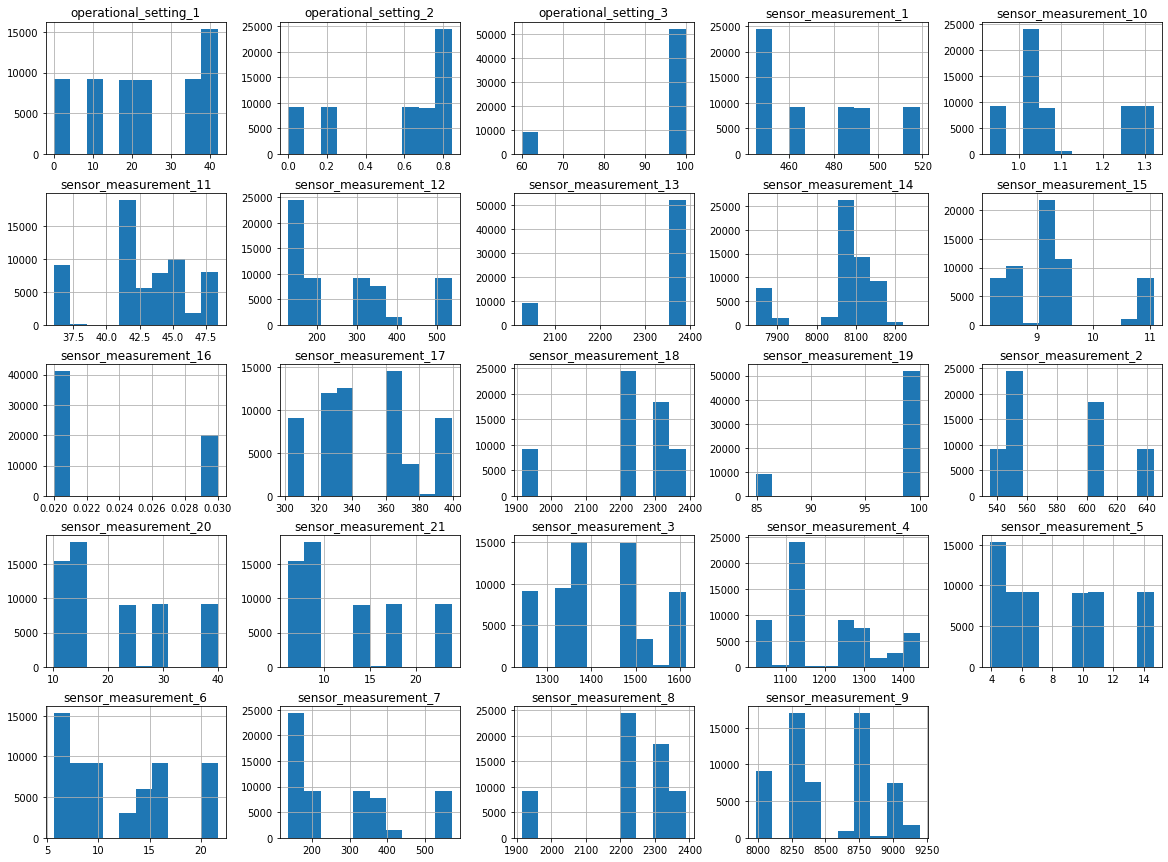

In [0]:
# Plotting Histograms to observe frequencies
X.hist(figsize=[20,15])

In [0]:
#confusion matrix
X.corr()

,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
operational_setting_1,1.000000,0.943796,-0.028425,-0.964754,-0.868390,-0.787848,-0.839988,-0.987382,-0.976518,-0.951582,-0.444728,-0.776800,-0.823819,-0.605412,-0.951158,-0.028443,-0.263960,0.460800,-0.840823,-0.790694,-0.444336,-0.028425,-0.962043,-0.962052
operational_setting_2,0.943796,1.000000,-0.066257,-0.886123,-0.811613,-0.761372,-0.837055,-0.933693,-0.929548,-0.919006,-0.440914,-0.754337,-0.882565,-0.623179,-0.918868,-0.066236,-0.356085,0.520309,-0.902160,-0.764491,-0.440552,-0.066257,-0.922004,-0.922000
operational_setting_3,-0.028425,-0.066257,1.000000,0.163835,0.478659,0.620181,0.544482,0.113471,0.197793,0.306687,0.902625,0.634634,0.514065,0.798813,0.308038,0.999998,0.928067,-0.881196,0.290752,0.616473,0.902830,1.000000,0.276239,0.276147
sensor_measurement_1,-0.964754,-0.886123,0.163835,1.000000,0.944439,0.870606,0.897421,0.986561,0.986539,0.973191,0.572469,0.861569,0.823653,0.705775,0.972915,0.163834,0.353450,-0.542375,0.789447,0.872955,0.572078,0.163835,0.977777,0.977791
sensor_measurement_2,-0.868390,-0.811613,0.478659,0.944439,1.000000,0.981750,0.980722,0.916509,0.944587,0.968979,0.809878,0.978305,0.904535,0.894876,0.969187,0.478666,0.624368,-0.776156,0.800320,0.982621,0.809591,0.478659,0.962824,0.962806
sensor_measurement_3,-0.787848,-0.761372,0.620181,0.870606,0.981750,1.000000,0.989744,0.842817,0.884586,0.929013,0.895268,0.998190,0.929839,0.960787,0.929499,0.620227,0.755184,-0.875041,0.801512,0.998693,0.895021,0.620181,0.917055,0.917020
sensor_measurement_4,-0.839988,-0.837055,0.544482,0.897421,0.980722,0.989744,1.000000,0.883579,0.919064,0.956314,0.843898,0.987901,0.961264,0.937163,0.956736,0.544531,0.719325,-0.846000,0.858554,0.990407,0.843615,0.544482,0.945999,0.945965
sensor_measurement_5,-0.987382,-0.933693,0.113471,0.986561,0.916509,0.842817,0.883579,1.000000,0.996316,0.979719,0.524506,0.832973,0.840662,0.673610,0.979416,0.113473,0.331134,-0.525064,0.824766,0.845583,0.524096,0.113471,0.985677,0.985696
sensor_measurement_6,-0.976518,-0.929548,0.197793,0.986539,0.944587,0.884586,0.919064,0.996316,1.000000,0.993180,0.594557,0.876139,0.875562,0.733706,0.993003,0.197794,0.408114,-0.594836,0.841052,0.887014,0.594169,0.197793,0.996289,0.996299
sensor_measurement_7,-0.951582,-0.919006,0.306687,0.973191,0.968979,0.929013,0.956314,0.979719,0.993180,1.000000,0.679196,0.922913,0.916964,0.805367,0.999993,0.306696,0.510037,-0.683952,0.859296,0.930983,0.678835,0.306687,0.999142,0.999140


# Linear Regression

In [0]:
from sklearn import metrics
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS

In [0]:
X.head()

,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,1.01,41.69,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,1.07,43.94,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,1.01,41.66,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,1.02,41.68,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,1915.22,7994.94,0.93,36.48,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


In [0]:
Y.head(25)

,RUL
index,
1,26
2,37
3,188
4,234
5,159
6,213
7,200
8,32
9,55


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
reg = OLS(y_train, X_train).fit()

ValueError: ignored

In [0]:
from sklearn import metrics
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
reg = OLS(y_train, X_train).fit()
y_pred = pd.DataFrame()   # dataframe for predictions vs actual y-values
y_pred['predictions'] = reg.predict(X_test)

# Print this directly
print(reg.predict(X_test))

TypeError: ignored

In [0]:
df = pd.DataFrame({'Actual': y_test["salary"], 'Predicted': y_pred["predictions"]})
df

# Simple Algorithm

In [0]:
import numpy as np
import pandas as pd
import featuretools as ft
from sklearn import metrics


In [0]:
import numpy as np
import pandas as pd
import featuretools as ft
#import utils

data_path = 'https://raw.githubusercontent.com/sanky2501/EDI-SEM-3/master/CMAPSSData/train_FD004.txt'

operational_settings = ['operational_setting_{}'.format(i + 1) for i in range (3)]
sensor_columns = ['sensor_measurement_{}'.format(i + 1) for i in range(26)]
cols = ['engine_no', 'time_in_cycles'] + operational_settings + sensor_columns
data = pd.read_csv(data_path, sep=' ', header=None, names=cols)
data = data.drop(cols[-5:], axis=1)
data['index'] = data.index
data.index = data['index']
data['time'] = pd.date_range('1/1/2000', periods=data.shape[0], freq='600s')
print('Loaded data with:\n{} Recordings\n{} Engines'.format(data.shape[0], len(data['engine_no'].unique())))
print('21 Sensor Measurements\n3 Operational Settings')

data.head()


Loaded data with:
61249 Recordings
249 Engines
21 Sensor Measurements
3 Operational Settings


,engine_no,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,index,time
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,1.01,41.69,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,0,2000-01-01 00:00:00
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,1.07,43.94,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,1,2000-01-01 00:10:00
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,1.01,41.66,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,2,2000-01-01 00:20:00
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,1.02,41.68,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,3,2000-01-01 00:30:00
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,1915.22,7994.94,0.93,36.48,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,4,2000-01-01 00:40:00


In [0]:
#https://raw.githubusercontent.com/sanky2501/EDI-SEM-3/master/dataset_train_FD004.csv


dataset = pd.read_csv('https://raw.githubusercontent.com/sanky2501/EDI-SEM-3/master/dataset_train_FD004.csv')
dataset.shape

(61249, 29)

In [0]:
from random import randint
import pandas as pd

def new_labels(data, labels):
    ct_ids = []
    ct_times = []
    ct_labels = []
    data = data.copy()
    data['RUL'] = labels
    gb = data.groupby(['engine_no'])
    for engine_no_df in gb:
        instances = engine_no_df[1].shape[0]
        r = randint(5, instances - 1)
        ct_ids.append(engine_no_df[1].iloc[r,:]['engine_no'])
        ct_times.append(engine_no_df[1].iloc[r,:]['time'])
        ct_labels.append(engine_no_df[1].iloc[r,:]['RUL'])
    ct = pd.DataFrame({'engine_no': ct_ids,
                       'cutoff_time': ct_times,
                       'RUL': ct_labels})
    ct = ct[['engine_no', 'cutoff_time', 'RUL']]
    ct.index = ct['engine_no']
    ct.index = ct.index.rename('index')
    return ct

def make_cutoff_times(data):
    gb = data.groupby(['engine_no'])
    labels = []


    for engine_no_df in gb:
        instances = engine_no_df[1].shape[0]
        label = [instances - i - 1 for i in range(instances)]
        labels += label
    
    return new_labels(data, labels)

cutoff_times = make_cutoff_times(data)

cutoff_times.head()

,engine_no,cutoff_time,RUL
index,,,
1,1,2000-01-02 13:00:00,98
2,2,2000-01-04 03:30:00,166
3,3,2000-01-05 12:00:00,278
4,4,2000-01-08 03:10:00,173
5,5,2000-01-10 15:40:00,3


In [0]:
def make_entityset(dataset):
    es = ft.EntitySet('Dataset')
    es.entity_from_dataframe(dataframe=dataset,
                             entity_id='recordings',
                             index='index',
                             time_index='time')

    es.normalize_entity(base_entity_id='recordings', 
                        new_entity_id='engines',
                        index='engine_no')

    es.normalize_entity(base_entity_id='recordings', 
                        new_entity_id='cycles',
                        index='time_in_cycles')
    return es
es = make_entityset(data)
es

Entityset: Dataset
  Entities:
    recordings [Rows: 61249, Columns: 28]
    engines [Rows: 249, Columns: 2]
    cycles [Rows: 543, Columns: 2]
  Relationships:
    recordings.engine_no -> engines.engine_no
    recordings.time_in_cycles -> cycles.time_in_cycles

In [0]:
fm, features = ft.dfs(entityset=es, 
                      target_entity='engines',
                      agg_primitives=['last', 'max', 'min'],
                      trans_primitives=[],
                      cutoff_time=cutoff_times,
                      max_depth=3,
                      verbose=True)
fm.to_csv('simple_fm.csv')

Built 290 features
Elapsed: 02:57 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 11/11 chunks


median predict

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

fm = pd.read_csv('simple_fm.csv', index_col='engine_no')
X = fm.copy().fillna(0)
y = X.pop('RUL')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)



FileNotFoundError: ignored

In [0]:
medianpredict1 = [np.median(y_train) for _ in y_test]
print('Baseline by median label: Mean Abs Error = {:.2f}'.format(
    mean_absolute_error(medianpredict1, y_test)))

Baseline by median label: Mean Abs Error = 58.04


In [0]:
recordings_from_train = es['recordings'].df[es['recordings'].df['engine_no'].isin(y_train.index)]
median_life = np.median(recordings_from_train.groupby(['engine_no']).apply(lambda df: df.shape[0]))

recordings_from_test = es['recordings'].df[es['recordings'].df['engine_no'].isin(y_test.index)]
life_in_test = recordings_from_test.groupby(['engine_no']).apply(lambda df: df.shape[0])-y_test

medianpredict2 = (median_life - life_in_test).apply(lambda row: max(row, 0))
print('Baseline by median life: Mean Abs Error = {:.2f}'.format(
    mean_absolute_error(medianpredict2, y_test)))

Baseline by median life: Mean Abs Error = 80.81


Random forest

In [0]:
reg = RandomForestRegressor(n_estimators=100)
reg.fit(X_train, y_train)

#preds = reg.predict(X_test)
y_pred = pd.DataFrame()   # dataframe for predictions vs actual y-values
y_pred['predictions'] = reg.predict(X_test)
#scores = mean_absolute_error(preds, y_test)
#print('Mean Abs Error: {:.2f}'.format(scores))
#high_imp_feats = utils.feature_importances(X, reg, feats=10)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds))  


Mean Absolute Error: 36.40761904761906


Multiple linear regression

In [0]:
from sklearn import metrics
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS

reg1 = OLS(y_train, X_train).fit()

preds1 = reg1.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds1))
#scores1 = mean_absolute_error(preds1, y_test)
#print('Mean Abs Error: {:.2f}'.format(scores1))
#high_imp_feats = utils.feature_importances(X, reg, feats=10)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mean Absolute Error: 14332.658140339385


In [0]:
preds1.head()

engine_no
49    -940819.630667
223        -2.254508
102      1074.461010
39       -289.161327
87       -129.262876
dtype: float64

Logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Fit the model with the training data
model.fit(X_train,y_train)

predict_test = model.predict(X_test) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict_test))


Mean Absolute Error: 69.11111111111111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)

# Predicted class
knn_pred=neigh.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, knn_pred))


Mean Absolute Error: 65.95238095238095


Kmeans

In [0]:
from sklearn.cluster import KMeans
import numpy as np
import time

kmeans = KMeans(n_clusters=62, random_state=0)
# Recording training time
start_time = time.time()
kmeans.fit(X_train,y_train)
#Kmeans_time = time.time() - start_time

kmeans_pred=kmeans.predict(X_test)
kmeans.cluster_centers_

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, kmeans_pred))


Mean Absolute Error: 97.4920634920635


Kmediots

In [0]:
from sklearn_extra.cluster import KMedoids
from sklearn_extra.cluster import KMedoids
import sklearn_extra.cluster._k_medoids
KMed=KMedoids(metric="euclidean", n_clusters=3)

# Recording training time
start_time = time.time()
KMed.fit(X_train,y_train)
#KMed_time = time.time() - start_time

pred_KMed=KMed.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_KMed))


ModuleNotFoundError: ignored

CNN

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model1 = Sequential()
#add model layers
model1.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model1.add(Conv2D(32, kernel_size=3, activation='relu'))
model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#train the model
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

ValueError: ignored

In [0]:
#predict first 4 images in the test set
model.predict(X_test[:4])

In [0]:
coeff_df = pd.DataFrame(reg1.coef_, X.columns, columns=['Coefficient'])  
coeff_df

AttributeError: ignored

In [0]:
dataframe.drop(["gender"],axis=1,inplace=True)


In [0]:
feature_list = list(data.columns)
# Get numerical feature importances
importances = list(reg.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: engine_no            Importance: 0.06
Variable: sensor_measurement_6 Importance: 0.01
Variable: sensor_measurement_12 Importance: 0.01
Variable: time_in_cycles       Importance: 0.0
Variable: operational_setting_1 Importance: 0.0
Variable: operational_setting_2 Importance: 0.0
Variable: operational_setting_3 Importance: 0.0
Variable: sensor_measurement_1 Importance: 0.0
Variable: sensor_measurement_2 Importance: 0.0
Variable: sensor_measurement_3 Importance: 0.0
Variable: sensor_measurement_4 Importance: 0.0
Variable: sensor_measurement_5 Importance: 0.0
Variable: sensor_measurement_7 Importance: 0.0
Variable: sensor_measurement_8 Importance: 0.0
Variable: sensor_measurement_9 Importance: 0.0
Variable: sensor_measurement_10 Importance: 0.0
Variable: sensor_measurement_11 Importance: 0.0
Variable: sensor_measurement_13 Importance: 0.0
Variable: sensor_measurement_14 Importance: 0.0
Variable: sensor_measurement_15 Importance: 0.0
Variable: sensor_measurement_16 Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

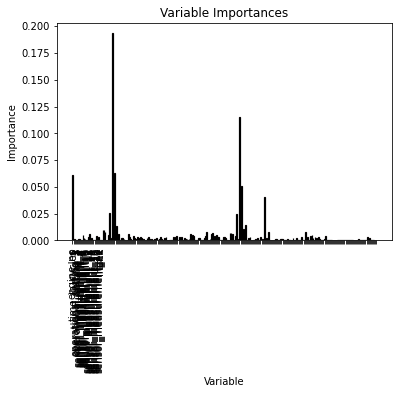

In [0]:
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

#Trial

In [0]:
import numpy as np
import pandas as pd
import featuretools as ft
from sklearn import metrics


In [0]:
import numpy as np
import pandas as pd
import featuretools as ft
#import utils

def load_data(data_path):
    operational_settings = ['operational_setting_{}'.format(i + 1) for i in range (3)]
    sensor_columns = ['sensor_measurement_{}'.format(i + 1) for i in range(26)]
    cols = ['engine_no', 'time_in_cycles'] + operational_settings + sensor_columns
    data = pd.read_csv(data_path, sep=' ', header=None, names=cols)
    data = data.drop(cols[-5:], axis=1)
    data['index'] = data.index
    data.index = data['index']
    data['time'] = pd.date_range('1/1/2000', periods=data.shape[0], freq='600s')
    print('Loaded data with:\n{} Recordings\n{} Engines'.format(data.shape[0], len(data['engine_no'].unique())))
    print('21 Sensor Measurements\n3 Operational Settings')
    return data

data_path = 'https://raw.githubusercontent.com/sanky2501/EDI-SEM-3/master/CMAPSSData/train_FD004.txt'
data_tri = load_data(data_path)
data_tri.head()


Loaded data with:
61249 Recordings
249 Engines
21 Sensor Measurements
3 Operational Settings


,engine_no,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,index,time
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,1.01,41.69,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,0,2000-01-01 00:00:00
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,1.07,43.94,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,1,2000-01-01 00:10:00
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,1.01,41.66,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,2,2000-01-01 00:20:00
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,1.02,41.68,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,3,2000-01-01 00:30:00
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,1915.22,7994.94,0.93,36.48,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,4,2000-01-01 00:40:00


In [0]:
data_tri.drop(["engine_no"],axis=1,inplace=True)
data_tri.drop(["time_in_cycles"],axis=1,inplace=True)
data_tri.drop(["index"],axis=1,inplace=True)
data_tri.drop(["time"],axis=1,inplace=True)


In [0]:
data_tri.head()

,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
index,,,,,,,,,,,,,,,,,,,,,,,,
0,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,1.01,41.69,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,1.07,43.94,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,1.01,41.66,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,1.02,41.68,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,1915.22,7994.94,0.93,36.48,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


In [0]:
feature_list = list(data_tri.columns)
# Get numerical feature importances
importances = list(reg.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

NameError: ignored

In [0]:
X_tri=

SyntaxError: ignored

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ae2176f98>,
      dtype=object)

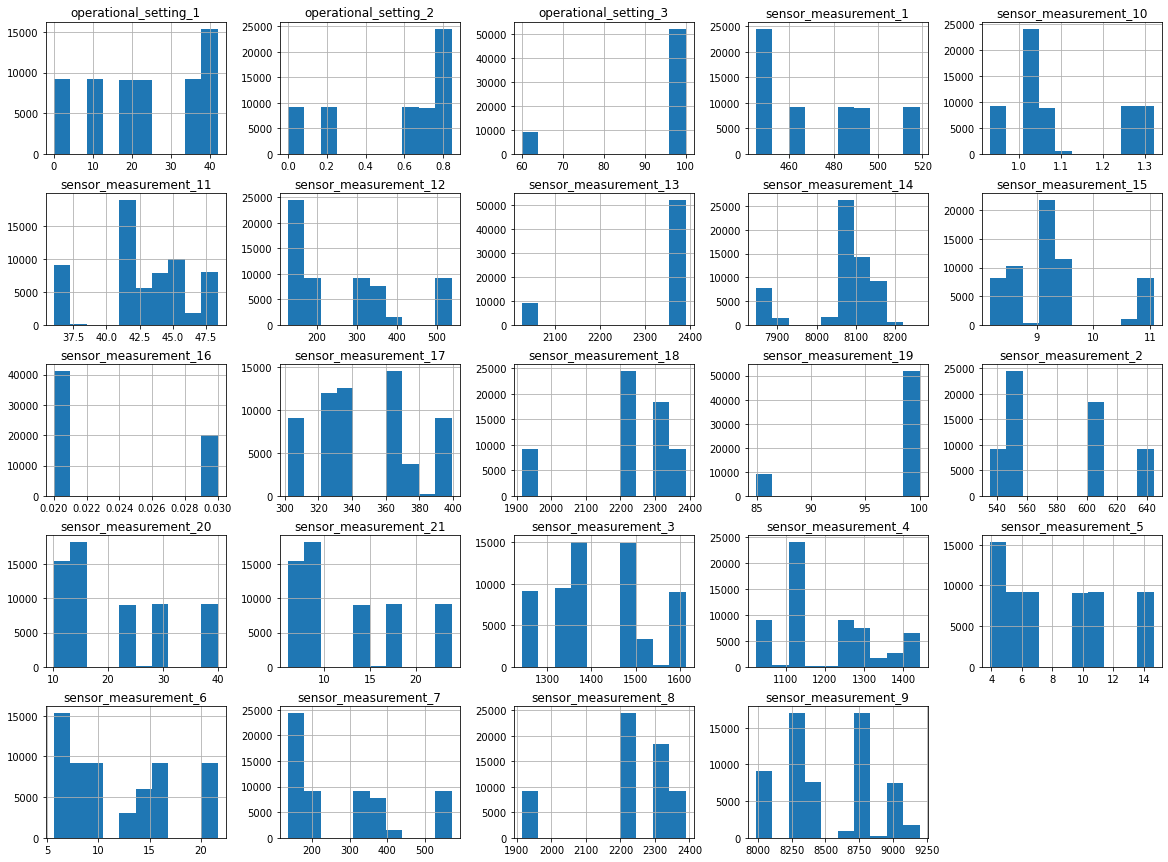

In [0]:
# Plotting Histograms to observe frequencies
data_tri.hist(figsize=[20,15])

In [0]:
data_tri.corr()

,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
operational_setting_1,1.000000,0.943796,-0.028425,-0.964754,-0.868390,-0.787848,-0.839988,-0.987382,-0.976518,-0.951582,-0.444728,-0.776800,-0.823819,-0.605412,-0.951158,-0.028443,-0.263960,0.460800,-0.840823,-0.790694,-0.444336,-0.028425,-0.962043,-0.962052
operational_setting_2,0.943796,1.000000,-0.066257,-0.886123,-0.811613,-0.761372,-0.837055,-0.933693,-0.929548,-0.919006,-0.440914,-0.754337,-0.882565,-0.623179,-0.918868,-0.066236,-0.356085,0.520309,-0.902160,-0.764491,-0.440552,-0.066257,-0.922004,-0.922000
operational_setting_3,-0.028425,-0.066257,1.000000,0.163835,0.478659,0.620181,0.544482,0.113471,0.197793,0.306687,0.902625,0.634634,0.514065,0.798813,0.308038,0.999998,0.928067,-0.881196,0.290752,0.616473,0.902830,1.000000,0.276239,0.276147
sensor_measurement_1,-0.964754,-0.886123,0.163835,1.000000,0.944439,0.870606,0.897421,0.986561,0.986539,0.973191,0.572469,0.861569,0.823653,0.705775,0.972915,0.163834,0.353450,-0.542375,0.789447,0.872955,0.572078,0.163835,0.977777,0.977791
sensor_measurement_2,-0.868390,-0.811613,0.478659,0.944439,1.000000,0.981750,0.980722,0.916509,0.944587,0.968979,0.809878,0.978305,0.904535,0.894876,0.969187,0.478666,0.624368,-0.776156,0.800320,0.982621,0.809591,0.478659,0.962824,0.962806
sensor_measurement_3,-0.787848,-0.761372,0.620181,0.870606,0.981750,1.000000,0.989744,0.842817,0.884586,0.929013,0.895268,0.998190,0.929839,0.960787,0.929499,0.620227,0.755184,-0.875041,0.801512,0.998693,0.895021,0.620181,0.917055,0.917020
sensor_measurement_4,-0.839988,-0.837055,0.544482,0.897421,0.980722,0.989744,1.000000,0.883579,0.919064,0.956314,0.843898,0.987901,0.961264,0.937163,0.956736,0.544531,0.719325,-0.846000,0.858554,0.990407,0.843615,0.544482,0.945999,0.945965
sensor_measurement_5,-0.987382,-0.933693,0.113471,0.986561,0.916509,0.842817,0.883579,1.000000,0.996316,0.979719,0.524506,0.832973,0.840662,0.673610,0.979416,0.113473,0.331134,-0.525064,0.824766,0.845583,0.524096,0.113471,0.985677,0.985696
sensor_measurement_6,-0.976518,-0.929548,0.197793,0.986539,0.944587,0.884586,0.919064,0.996316,1.000000,0.993180,0.594557,0.876139,0.875562,0.733706,0.993003,0.197794,0.408114,-0.594836,0.841052,0.887014,0.594169,0.197793,0.996289,0.996299
sensor_measurement_7,-0.951582,-0.919006,0.306687,0.973191,0.968979,0.929013,0.956314,0.979719,0.993180,1.000000,0.679196,0.922913,0.916964,0.805367,0.999993,0.306696,0.510037,-0.683952,0.859296,0.930983,0.678835,0.306687,0.999142,0.999140


In [0]:
data_col=[ 'operational_setting_1',
       'operational_setting_2', 'operational_setting_3',
       'sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3',
       'sensor_measurement_4', 'sensor_measurement_5', 'sensor_measurement_6',
       'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9',
       'sensor_measurement_10', 'sensor_measurement_11',
       'sensor_measurement_12', 'sensor_measurement_13',
       'sensor_measurement_14', 'sensor_measurement_15',
       'sensor_measurement_16', 'sensor_measurement_17',
       'sensor_measurement_18', 'sensor_measurement_19',
       'sensor_measurement_20', 'sensor_measurement_21']
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(-1, 1)) # The range in which you want to scale the values
X_min_max=min_max.fit_transform(data_tri[data_col])

In [0]:
#Contains Only Float or Integer type values
pd.DataFrame(X_min_max,columns=data_col).head(249)

,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,0.999852,0.995249,1.0,-1.000000,-0.739306,-0.455837,-0.574829,-1.000000,-0.996236,-0.994524,0.253967,-0.460843,-0.589744,-0.082792,-0.992815,0.986223,0.101546,-0.198921,-1.0,-0.422680,0.255814,1.0,-0.969055,-0.968238
1,-0.047705,0.663183,1.0,0.253970,0.295943,0.268814,0.023562,0.015873,-0.003764,-0.098426,0.725777,0.202821,-0.282051,0.282468,-0.099272,0.984790,-0.036478,-0.297309,-1.0,0.216495,0.729387,1.0,-0.044063,-0.037026
2,0.999800,0.997387,1.0,-1.000000,-0.752708,-0.457511,-0.555038,-1.000000,-0.997491,-0.990751,0.254220,-0.468481,-0.589744,-0.087662,-0.993597,0.986113,0.062063,-0.152425,-1.0,-0.443299,0.255814,1.0,-0.978473,-0.962137
3,0.999619,0.995249,1.0,-1.000000,-0.757298,-0.467664,-0.550330,-1.000000,-0.996236,-0.991671,0.254051,-0.459144,-0.538462,-0.084416,-0.992717,0.986388,0.107413,-0.196568,-1.0,-0.463918,0.255814,1.0,-0.974437,-0.962552
4,0.190549,0.474347,-1.0,-0.523822,-0.988618,-0.932169,-0.955951,-0.413632,-0.582183,-0.822152,-0.997890,-0.982793,-1.000000,-0.928571,-0.825016,-0.997189,-0.903720,0.841071,-1.0,-0.938144,-1.000000,-1.0,-0.739657,-0.708880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,-0.047819,0.662708,1.0,0.253970,0.310079,0.311533,0.066939,0.015873,-0.003764,-0.077904,0.726832,0.218114,-0.230769,0.350649,-0.083435,0.986609,0.066006,-0.340206,-1.0,0.278351,0.729387,1.0,-0.028591,-0.020589
245,0.190535,0.472684,-1.0,-0.523822,-0.987149,-0.892582,-0.895280,-0.413632,-0.582183,-0.818470,-0.996835,-0.954203,-0.948718,-0.922078,-0.821106,-0.995591,-0.846442,0.838511,-1.0,-0.938144,-1.000000,-1.0,-0.724857,-0.714644
246,0.666583,0.999762,1.0,-0.879462,-0.629337,-0.337996,-0.505896,-0.706816,-0.711418,-0.728833,0.301021,-0.396849,-0.487179,-0.087662,-0.732294,0.986664,0.118811,-0.283055,-1.0,-0.360825,0.302326,1.0,-0.671039,-0.671803
247,0.190468,0.476247,-1.0,-0.523822,-0.982743,-0.945346,-0.929627,-0.413632,-0.582183,-0.816952,-0.996919,-0.953460,-0.948718,-0.930195,-0.821057,-0.995646,-0.847837,0.825573,-1.0,-0.896907,-1.000000,-1.0,-0.717457,-0.715947


In [0]:
X_min_max.hist(figsize=[20,15])

AttributeError: ignored

In [0]:
data_tri.values.reshape(-1,1)

array([[ 42.0049],
       [  0.84  ],
       [100.    ],
       ...,
       [100.    ],
       [ 10.66  ],
       [  6.4341]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ae1226fd0>,
      dtype=object)

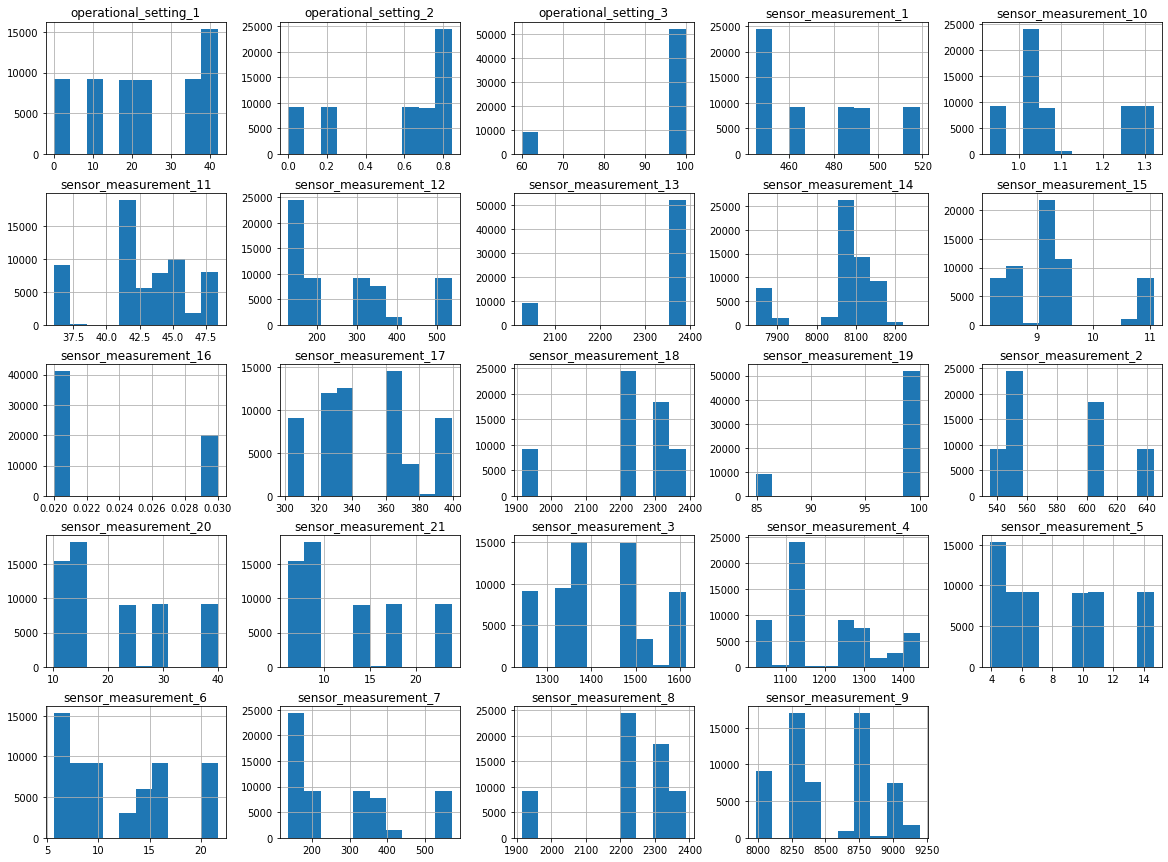

In [0]:
data_tri.hist(figsize=[20,15])

In [0]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred["predictions"]})
df

NameError: ignored

In [0]:
y_test.head(48)

NameError: ignored

In [0]:
y_pred.head(48)

,predictions
0,179.91
1,36.50
2,110.83
3,185.22
4,126.85
5,199.61
6,173.35
7,73.43
8,63.22
9,187.90


In [0]:
reg = RandomForestRegressor(n_estimators=100)
reg.fit(X_train, y_train)

#preds = reg.predict(X_test)
y_pred = pd.DataFrame()   # dataframe for predictions vs actual y-values
y_pred['predictions'] = reg.predict(X_test)
#scores = mean_absolute_error(preds, y_test)
#print('Mean Abs Error: {:.2f}'.format(scores))
#high_imp_feats = utils.feature_importances(X, reg, feats=10)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds))  


Mean Absolute Error: 36.40761904761906


In [0]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred["predictions"]})
df

,Actual,Predicted
0,NaN,179.91
1,98.0,36.50
2,NaN,110.83
3,NaN,185.22
4,NaN,126.85
...,...,...
223,43.0,NaN
239,119.0,NaN
240,31.0,NaN
245,62.0,NaN


#test data det 

In [0]:
https://raw.githubusercontent.com/sanky2501/EDI-SEM-3/master/CMAPSSData/test_FD004.txt

In [0]:
reg = RandomForestRegressor(n_estimators=100)
reg.fit(X_train, y_train)

#preds = reg.predict(X_test)
y_pred = pd.DataFrame()   # dataframe for predictions vs actual y-values
y_pred['predictions'] = reg.predict(X_test)
#scores = mean_absolute_error(preds, y_test)
#print('Mean Abs Error: {:.2f}'.format(scores))
#high_imp_feats = utils.feature_importances(X, reg, feats=10)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds))  


NameError: ignored

In [0]:
import utils
data3 = utils.load_data('https://raw.githubusercontent.com/sanky2501/EDI-SEM-3/master/CMAPSSData/test_FD004.txt')
es2 = make_entityset(data3)
fm2 = ft.calculate_feature_matrix(entityset=es2, features=features, verbose=True)
fm2.head()

ModuleNotFoundError: ignored

In [0]:
import numpy as np
import pandas as pd
import featuretools as ft
#import utils

def load_data(data_path):
    operational_settings = ['operational_setting_{}'.format(i + 1) for i in range (3)]
    sensor_columns = ['sensor_measurement_{}'.format(i + 1) for i in range(26)]
    cols = ['engine_no', 'time_in_cycles'] + operational_settings + sensor_columns
    data = pd.read_csv(data_path, sep=' ', header=None, names=cols)
    data = data.drop(cols[-5:], axis=1)
    data['index'] = data.index
    data.index = data['index']
    data['time'] = pd.date_range('1/1/2000', periods=data.shape[0], freq='600s')
    print('Loaded data with:\n{} Recordings\n{} Engines'.format(data.shape[0], len(data['engine_no'].unique())))
    print('21 Sensor Measurements\n3 Operational Settings')
    return data

data_path = 'https://raw.githubusercontent.com/sanky2501/EDI-SEM-3/master/CMAPSSData/test_FD004.txt'
data4 = load_data(data_path)
data4.head()


Loaded data with:
41214 Recordings
248 Engines
21 Sensor Measurements
3 Operational Settings


,engine_no,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,index,time
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,13.60,332.52,2323.67,8704.98,1.07,43.83,313.03,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007,0,2000-01-01 00:00:00
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,9.00,174.46,1915.21,7999.94,0.93,36.11,163.61,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748,1,2000-01-01 00:10:00
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,5.69,137.34,2211.93,8305.38,1.01,41.52,129.98,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365,2,2000-01-01 00:20:00
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,5.69,137.23,2211.89,8301.00,1.01,41.73,129.48,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367,3,2000-01-01 00:30:00
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,7.97,192.94,2222.71,8331.05,1.02,41.32,181.82,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326,4,2000-01-01 00:40:00


In [0]:
es2 = make_entityset(data4)
fm2 = ft.calculate_feature_matrix(entityset=es2, features=features, verbose=True)
fm2.head()

NameError: ignored

In [0]:
X = fm2.copy().fillna(0)
y = pd.read_csv('https://raw.githubusercontent.com/sanky2501/EDI-SEM-3/master/CMAPSSData/RUL_FD004.txt', sep=' ', header=None, names=['RUL'], index_col=False)
preds2 = reg.predict(X)
print('Mean Abs Error: {:.2f}'.format(mean_absolute_error(preds2, y)))

NameError: ignored